In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,classification_report,confusion_matrix,roc_curve, roc_auc_score,auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import xgboost as xg
from sklearn import svm
import sklearn.metrics as metrics

In [2]:
dataset = pd.read_csv("Reviews.csv")
dataset.head()

,Unnamed: 0,Review,Label
0,0,booked rooms family staycation sadly forgettab...,Negative
1,1,booked bay suite family seamless booking proce...,Postive
2,2,world class service highly recommended anyone ...,Postive
3,3,family adults kids thoroughly enjoyable stayca...,Postive
4,4,looking unforgettable staycation experience pl...,Postive


In [3]:
dataset.dtypes

Unnamed: 0     int64
Review        object
Label         object
dtype: object

In [4]:
dataset.isna().sum()

Unnamed: 0    0
Review        0
Label         0
dtype: int64

In [5]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
print("Data Head\n\n",dataset.head())

Data Head

                                               Review     Label
0  booked rooms family staycation sadly forgettab...  Negative
1  booked bay suite family seamless booking proce...   Postive
2  world class service highly recommended anyone ...   Postive
3  family adults kids thoroughly enjoyable stayca...   Postive
4  looking unforgettable staycation experience pl...   Postive


In [7]:
dataset["Label"].value_counts()

Postive     10796
Negative      522
Neutral       132
Name: Label, dtype: int64

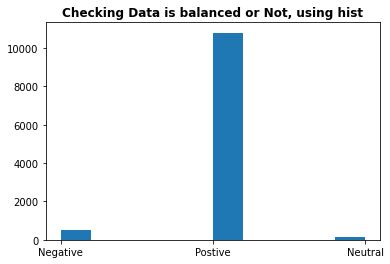

In [8]:
plt.hist(dataset.Label)
plt.title("Checking Data is balanced or Not, using hist",fontweight ="bold")
plt.show()

In [9]:
count_vect = CountVectorizer(max_features = 4000)
X = count_vect.fit_transform(dataset['Review']).toarray()

In [10]:
X.shape

(11450, 4000)

In [11]:
over_sample = SMOTE(random_state = 42, sampling_strategy = "all")

In [12]:
X_train_oversample, y_train_oversample = over_sample.fit_sample(X,dataset['Label'])

In [13]:
y_train_oversample.value_counts()

Negative    10796
Postive     10796
Neutral     10796
Name: Label, dtype: int64

In [14]:
X_train_oversample.shape

(32388, 4000)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X_train_oversample, y_train_oversample, test_size = 0.2, random_state = 42)

In [17]:
print("X_train shape=",x_train.shape,'\n',"y_train shape=",y_train.shape)
print("x_test shape=",x_test.shape,'\n',"Y_test shape=" ,y_test.shape)

X_train shape= (25910, 4000) 
 y_train shape= (25910,)
x_test shape= (6478, 4000) 
 Y_test shape= (6478,)


## use machine learning algorithms for training

# 1. Random Forest Algorithm

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(n_estimators = 120, random_state = 50, n_jobs = -1, max_features = 'auto')

In [19]:
rf_cl.fit(X_train_oversample, y_train_oversample)

RandomForestClassifier(n_estimators=120, n_jobs=-1, random_state=50)

In [21]:
pred = rf_cl.predict(x_test)

In [22]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [23]:
accuracy_score(y_test, pred)

0.968045693115159

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score

In [26]:
print(confusion_matrix(y_test, pred))

[[1980  168    0]
 [  39 2105    0]
 [   0    0 2186]]


In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    Negative       0.98      0.92      0.95      2148
     Neutral       0.93      0.98      0.95      2144
     Postive       1.00      1.00      1.00      2186

    accuracy                           0.97      6478
   macro avg       0.97      0.97      0.97      6478
weighted avg       0.97      0.97      0.97      6478



In [29]:
recall_score(y_test, pred,average='micro')

0.968045693115159

In [32]:
precision_score(y_test, pred, average='micro')

0.968045693115159

In [33]:
xgb = xg.XGBClassifier(learning_rate = 0.01,
                       colsample_bytree = 0.8,
                       subsample = 0.8,
                       objective = 'multi:softmax', 
                       n_estimators = 100, 
                       reg_alpha = 0.3,
                       max_depth = 4, 
                       gamma = 1,
                       num_class = 3)

In [34]:
xgb.fit(X_train_oversample,y_train_oversample)

C:\Users\sonih\anaconda3\envs\P39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.3,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
xgb_pred = xgb.predict(x_test)

In [36]:
accuracy_score(y_test, xgb_pred)

0.710558814448904

In [37]:
print(confusion_matrix(y_test, xgb_pred))

[[1544  511   93]
 [ 745 1318   81]
 [ 297  148 1741]]


In [38]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

    Negative       0.60      0.72      0.65      2148
     Neutral       0.67      0.61      0.64      2144
     Postive       0.91      0.80      0.85      2186

    accuracy                           0.71      6478
   macro avg       0.72      0.71      0.71      6478
weighted avg       0.73      0.71      0.71      6478



In [40]:
recall_score(y_test, xgb_pred, average='micro')

0.710558814448904

In [41]:
svm = svm.LinearSVC(multi_class = 'ovr')
svm.fit(X_train_oversample,y_train_oversample)

C:\Users\sonih\anaconda3\envs\P39\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

In [42]:
svm_pred = svm.predict(x_test)

In [43]:
accuracy_score(y_test, svm_pred)

0.9385612843470207

In [44]:
print(confusion_matrix(y_test, svm_pred))

[[1844  304    0]
 [  94 2050    0]
 [   0    0 2186]]


In [45]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

    Negative       0.95      0.86      0.90      2148
     Neutral       0.87      0.96      0.91      2144
     Postive       1.00      1.00      1.00      2186

    accuracy                           0.94      6478
   macro avg       0.94      0.94      0.94      6478
weighted avg       0.94      0.94      0.94      6478



In [49]:
from sklearn import model_selection

In [50]:
from sklearn.ensemble import BaggingClassifier

In [51]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [52]:
seed = 8
kfold = model_selection.KFold(n_splits = 3, random_state = seed) 

C:\Users\sonih\anaconda3\envs\P39\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [53]:
model = BaggingClassifier(base_estimator = mnb, n_estimators = 10) 

In [54]:
results = model_selection.cross_val_score(model, X_train_oversample, y_train_oversample, cv = kfold) 
print("accuracy :") 
print(results.max()) 

accuracy :
0.9418303075213041


In [56]:
pred4 = model.predict(x_test)

In [57]:
accuracy_score(y_test, pred4)

0.8661623958011732

In [58]:
print(confusion_matrix(y_test, pred4))

[[1595  362  191]
 [ 112 1864  168]
 [  33    1 2152]]


In [59]:
LR = LogisticRegression(solver = 'liblinear',
                       multi_class = 'ovr',
                       max_iter = 1000,
                       random_state = 42,
                       penalty ="l2")
LR.fit(X_train_oversample,y_train_oversample)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42,
                   solver='liblinear')

In [60]:
LR_pred = LR.predict(x_test)

In [61]:
accuracy_score(y_test, LR_pred)

0.9282185859833282

In [62]:
print(confusion_matrix(y_test, LR_pred))

[[1812  331    5]
 [ 112 2025    7]
 [   9    1 2176]]


In [88]:
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

    Negative       0.94      0.84      0.89      2148
     Neutral       0.86      0.94      0.90      2144
     Postive       0.99      1.00      0.99      2186

    accuracy                           0.93      6478
   macro avg       0.93      0.93      0.93      6478
weighted avg       0.93      0.93      0.93      6478



In [63]:
from sklearn.multiclass import OneVsRestClassifier

In [64]:
ovr_model = OneVsRestClassifier(xg.XGBClassifier())
ovr_model.fit(X_train_oversample,y_train_oversample)

C:\Users\sonih\anaconda3\envs\P39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, reg_alpha=None,
                                      

In [65]:
ovr_model_pred = ovr_model.predict(x_test)

In [66]:
accuracy_score(y_test, ovr_model_pred)

0.9402593393022538

In [67]:
print(confusion_matrix(y_test, ovr_model_pred))

[[1859  281    8]
 [  76 2062    6]
 [  13    3 2170]]


In [68]:
print(classification_report(y_test, ovr_model_pred))

              precision    recall  f1-score   support

    Negative       0.95      0.87      0.91      2148
     Neutral       0.88      0.96      0.92      2144
     Postive       0.99      0.99      0.99      2186

    accuracy                           0.94      6478
   macro avg       0.94      0.94      0.94      6478
weighted avg       0.94      0.94      0.94      6478



In [76]:
review = ["service is bad"]

In [77]:
r = count_vect.transform(review)

In [78]:
r

<1x4000 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [79]:
rf_cl.predict(r)

array(['Negative'], dtype=object)

In [124]:
import pickle

In [125]:
file = open('vectorize.pkl','wb')

# dump information to that file
pickle.dump(count_vect, file)
file.close()

In [126]:
# open a file, where you want to share the data
file = open('model.pkl','wb')

# dump information to that file
pickle.dump(ovr_model, file)
file.close()